<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [2]:
try:
    data = pd.read_csv('D:\\Мои документы\\DS\\insurance.csv')
except:
    data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


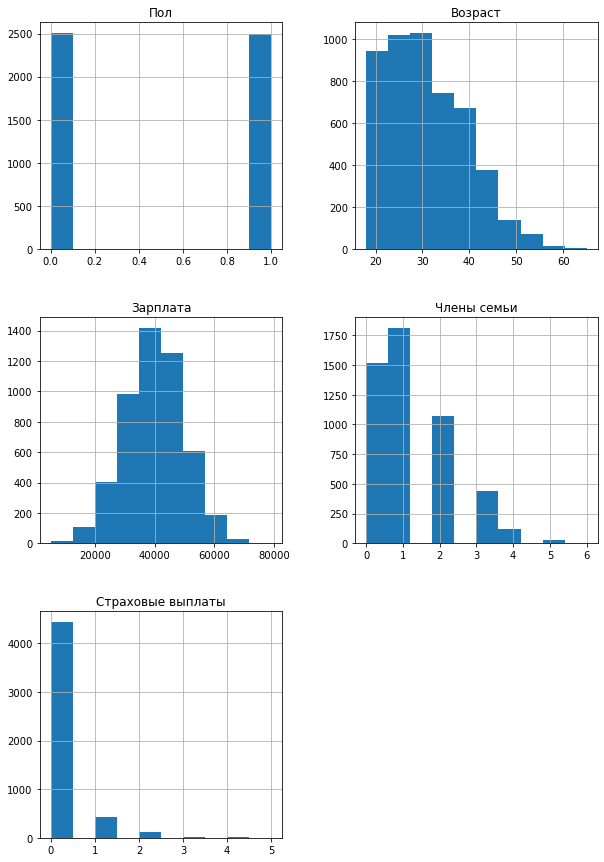

In [5]:
data.hist(figsize=(10, 15));

**Согласно документации в датафрейме содержится следующая информация:**

**Признаки**

- Пол
- Возраст
- Зарплата
- Члены семьи -количество членов его семьи.

**Целевой признак**

- Страховые выплаты -количество страховых выплат клиенту за последние 5 лет.

**Вывод**

- Всего в датасете 5000 строк и 5 столбцов. Из них 2 колонки с признаками типа float64 ``Возраст, Зарплата``.
- Названия колонок соответствуют документации.
- Пропущенных значений нет. 
- Выбросов нет.


### Предобработка данных

В столбцах Возраст и Зарплата переведем данные в формат int.

In [6]:
data['Возраст'] = pd.array(data['Возраст'], dtype=pd.Int64Dtype())
data['Возраст'].dtypes

Int64Dtype()

In [7]:
data['Зарплата'] = data['Зарплата'].fillna(0).astype(np.int64, errors='ignore')
data['Зарплата'].dtypes

dtype('int64')

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

 Признаки умножают на обратимую матрицу.
 
Изменится ли качество линейной регрессии? (Её можно обучить заново.)

- $X$ — матрица признаков 

- $O$ — обратимая матрица 


Задача обучения с признаками умноженными на обратимую матрицу:

$$
w = ((XO)^T XO)^{-1} (XO)^T y
$$

$$
w = O^{-1}(O^TX^T X)^{-1} O^TX^T y
$$

$$
w = O^{-1}(X^T X)^{-1} (O^T)^{-1} O^TX^T y
$$

При перемножении  $$(O^T)^{-1} O^T$$ выходит единичная матрица, сократим уравнение:

$$
w = O^{-1}(X^T X)^{-1} X^T y
$$

т.к. $$(X^T X)^{-1} X^T y$$ - это  $w$

$$
w = O^{-1}w
$$

а предсказание у нас: $$
a = Xw
$$


подставим наше уравнение в предсказание с матрицей перемноженой на обратимную $$
a = XOO^{-1}w
$$


$$
a = Xw
$$


**Ответ:** Качество линейной регрессии не изменится. 

**Обоснование:** Так как предсказания по признакам равны c предсказаниями по признакам умноженным на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**

- Разделим данные на признаки и целевой признак.
- Создадим обратимую матрицу О  
- Зашифруем признаки умножив их на обратимую матрицу 
- Разделим изначальные даные и зашифрованную матрицу на тестовую и тренировочную выборку.
- Сравним метрики R2.

**Обоснование**

Так как предсказания равны , при умножении матрицы признаков на обратимую матрицу, метрики качества не изменятся.

Напишем функцию, которая создаст обратимую матрицу, и зашифрует признаки умножив их на обратимую матрицу

In [8]:
def matrix_o(features):
    # Создание случайную матрицу размером по длине признаков
    matrix = np.random.randint(100, size=(len(features.columns),len(features.columns)))

    # Проверка, что матрица обратима
    if np.linalg.det(matrix) != 0:
        # Если матрица обратима, то находим ее обратную
        inverse_matrix = np.linalg.inv(matrix)
        return matrix, features@matrix
        print("Матрица не обратима")
    

Создадим функцию для обучения модели линейной регресии, которая разделит данные на выборки, обучит модель и вернет значение метрики R2

In [9]:
def LinearRegresssion_r(features, target):
    
    # разделение на выборки обуч. 75% и вал. 25%
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=.25, random_state=12345)
    
    print('Размер тренировочной выборки признаков:', features_train.shape, 
          'целевого признака:', target_train.shape)
    print('Размер валидационной выборки признаков:', features_valid.shape, 
          'целевого признака:', target_valid.shape)
    print()
    
    model = LinearRegression() 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid) 

    r2 = r2_score(target_valid, predictions) 

    print('R2 модели: {:.3f}'.format(r2))
    
    return r2

## Проверка алгоритма

Разделим данные на признаки и целевой признак.

In [10]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Создадим обратимую матрицу О и зашифрованые признаки 

In [11]:
O,features_O =matrix_o(features)

найдем R2 на данных

In [12]:
r2_data=LinearRegresssion_r(features, target)

Размер тренировочной выборки признаков: (3750, 4) целевого признака: (3750,)
Размер валидационной выборки признаков: (1250, 4) целевого признака: (1250,)

R2 модели: 0.435


найдем R2 на зашифрованных данных

In [13]:
r2_O=LinearRegresssion_r(features_O, target)

Размер тренировочной выборки признаков: (3750, 4) целевого признака: (3750,)
Размер валидационной выборки признаков: (1250, 4) целевого признака: (1250,)

R2 модели: 0.435


**Метрика R2 одинакова для исходных данных и для зашифрованных.**

Вернем зашифрованную матрицу к исходной путем умножения на обратную матрицу О. Сравним с исходными данными.

In [14]:
features_return= features_O @  np.linalg.inv(O)
features_return.head(5)

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0


In [15]:
features.head(5)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Проверим равенство исходных данных и зашифрованных после преобразования обратно в исходные.

In [16]:
if np.allclose(features.astype(np.float64), features_return.astype(np.float64), rtol=1e-3):
    print("Матрицы равны")
else:
    print("Матрицы различны")

Матрицы равны


**ВЫВОД**

- Исходные данные содержат 5000 строк и 5 столбцов, целевой признак - количество страховых выплат.
- Пропусков в данных не было.
- 2 колонки с признаками типа float64 Возраст, Зарплата были изменены на тип данных int.
- Данные были зашифрованы путем умножения матрицы признаков на обратимую матрицу размера.
- Качетсво предсказаний линейной регрессии  при преобразовании не изменилось.
- Метрика R2 составила 0,435 как на исходных данных, так и на зашифрованных.
- Защифрованные данные возможно вернуть в исходное состояние  умножив их на обратную матрицу-преобразователь.
